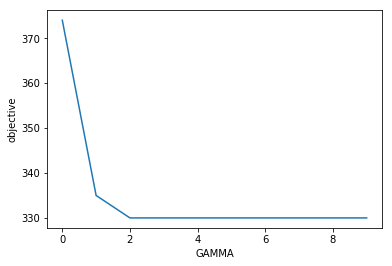

In [2]:
from gurobipy import GRB,Model
utility = [26,65,35,48,26,53,32,56,58,62]
weight = [27,28,16,28,24,16,19,23,29,29]
capacity = 120
numItems = len(weight)
items = range(numItems)
problem = Model("robustKnapsack")
x = problem.addVars(numItems, vtype=GRB.INTEGER, name='x')
la = problem.addVars(numItems, name='lambda')
tau = problem.addVar(name='tau')
problem.setObjective(sum(x[i] * utility[i] for i in items), GRB.MAXIMIZE)
objLog = [0 for i in items]
problem.setParam('OutputFlag', 0)
for GAMMA in items:
    problem.update()
    problem.addConstr(sum(x[i] * weight[i] for i in items) + GAMMA*tau + sum(la[i] for i in items) <= capacity,'c1')
    for i in items:
        problem.addConstr(la[i] + tau >= .1 * weight[i] * x[i],'c2')
    problem.optimize()
    objLog[GAMMA]=problem.objVal
    problem.remove(problem.getConstrByName('c1'))
    problem.remove(problem.getConstrByName('c2'))
import matplotlib.pyplot as plt
plt.plot(objLog)
plt.ylabel('objective')
plt.xlabel('GAMMA')
del problem
